# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import numpy and pandas
import numpy as np
import pandas as pd


# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
# Your code here:

sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
# Your code here:
sensor.isnull().sum()


attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [5]:
# Your code here:
sensor.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attitude.roll       1751 non-null   float64
 1   attitude.pitch      1751 non-null   float64
 2   attitude.yaw        1751 non-null   float64
 3   gravity.x           1751 non-null   float64
 4   gravity.y           1751 non-null   float64
 5   gravity.z           1751 non-null   float64
 6   rotationRate.x      1751 non-null   float64
 7   rotationRate.y      1751 non-null   float64
 8   rotationRate.z      1751 non-null   float64
 9   userAcceleration.x  1751 non-null   float64
 10  userAcceleration.y  1751 non-null   float64
 11  userAcceleration.z  1751 non-null   float64
dtypes: float64(12)
memory usage: 164.3 KB


To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [6]:
# Your code here:

date = pd.date_range(start='1/1/2018 00:00:00', end = '1/1/2018 00:29:10', periods=1751)


Assign the time series index to the dataframe's index.

In [7]:
# Your code here:
sensor = sensor.set_index(date)
sensor.head()


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [18]:
# Your code here:
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.graphics import tsaplots
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt



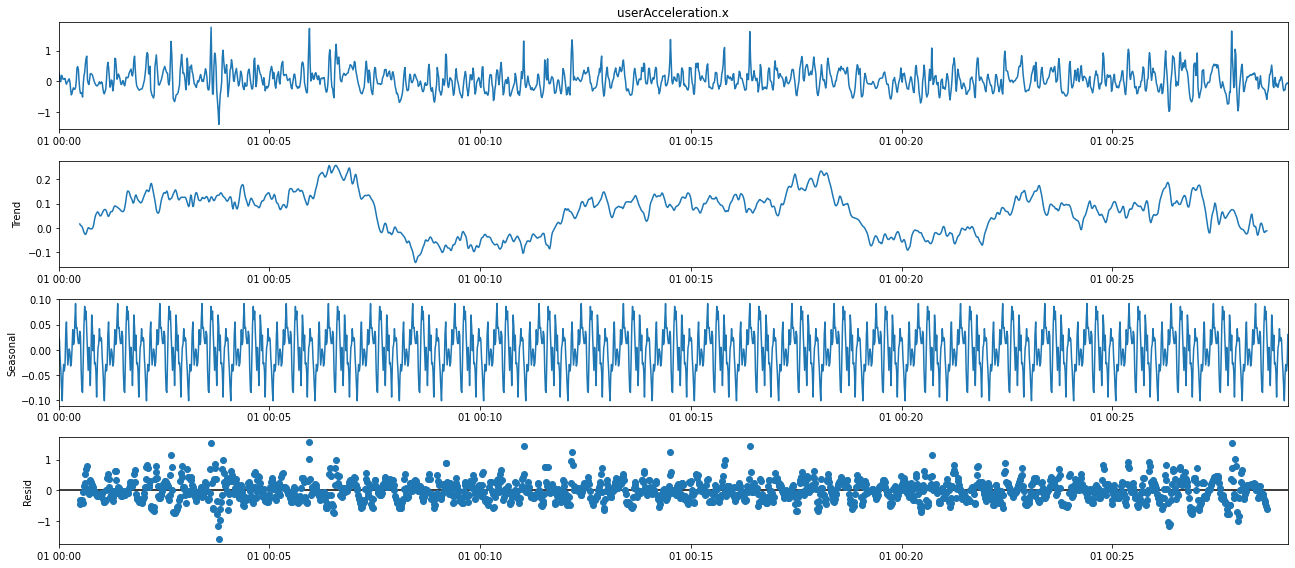

In [19]:
                                                        #24h 60 min agrupacion de 5 min
user = sensor['userAcceleration.x']                                                        #24h 60 min agrupacion de 5 min
decomposition = sm.tsa.seasonal_decompose(user, period=60)
fig = decomposition.plot()
plt.show()
plt.show()


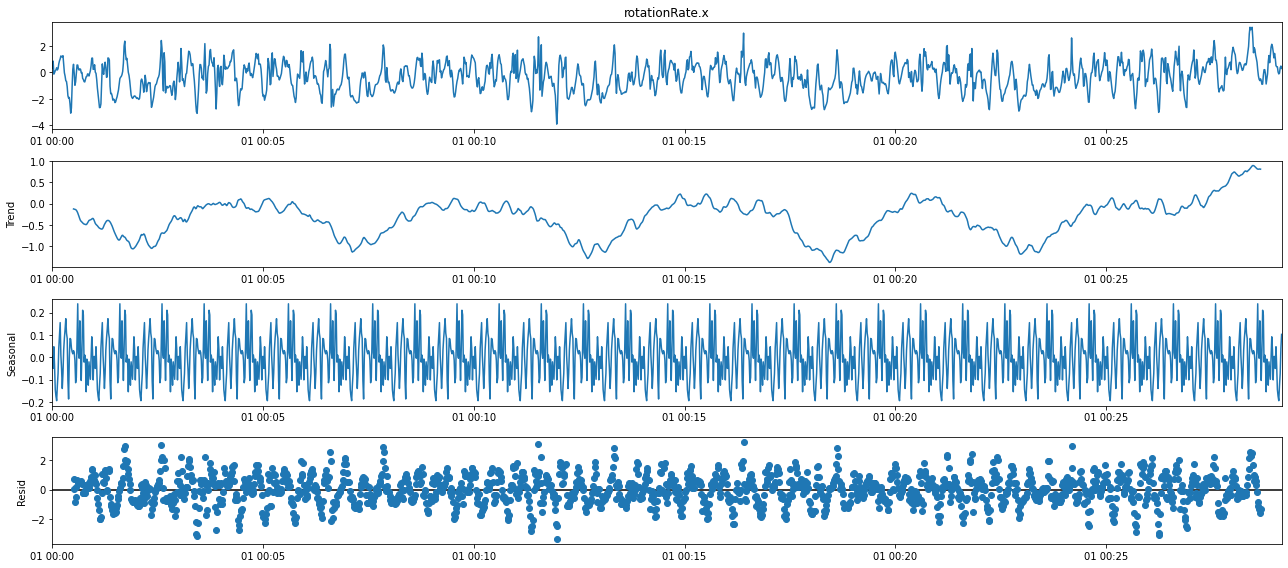

In [20]:
user = sensor['rotationRate.x']                                                        #24h 60 min agrupacion de 5 min
decomposition = sm.tsa.seasonal_decompose(user, period=60)
fig = decomposition.plot()
plt.show()


Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

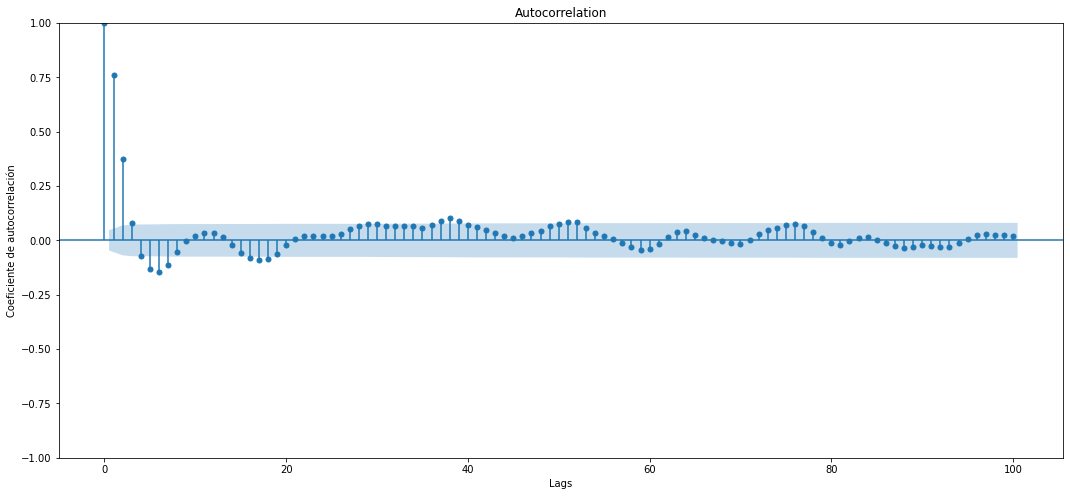

In [27]:
# Your code here:

tsaplots.plot_acf(sensor['userAcceleration.x'].values.squeeze(), lags=100)
plt.xlabel('Lags')
plt.ylabel('Coeficiente de autocorrelación')
plt.show()

Create a lag plot for `rotationRate.x`

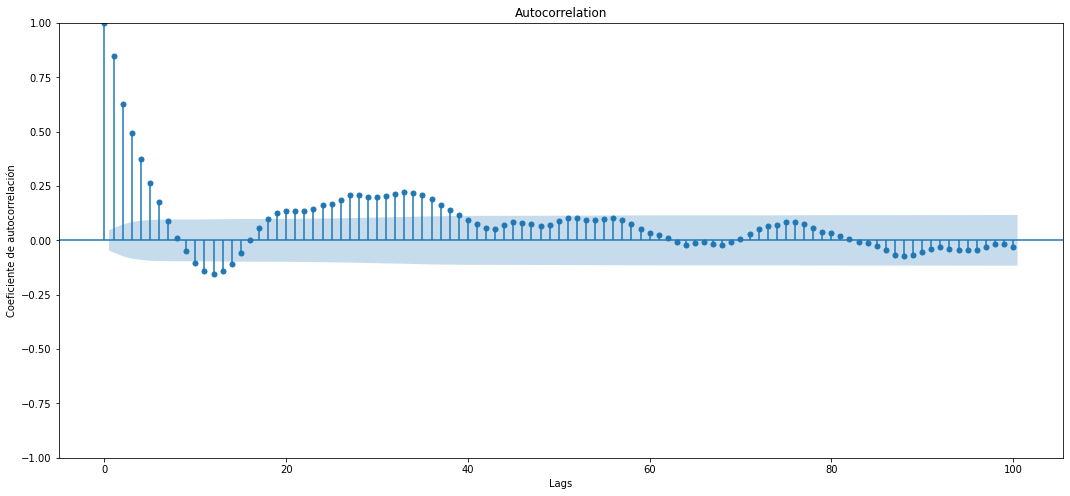

In [28]:
# Your code here:

tsaplots.plot_acf(sensor['rotationRate.x'].values.squeeze(), lags=100)
plt.xlabel('Lags')
plt.ylabel('Coeficiente de autocorrelación')
plt.show()

What are your conclusions from both visualizations?

In [11]:
# Your conclusions here:
# Las dos graficas siguen un patrón y tienen una correlación entre ellas


The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [43]:
# Your code here:

class Stationary:
  def __init__(self, significance=0.05):
    self.significance_level = significance
    self.pvalue = None
    self.is_stationary = None

  def ADF(self, values):
    result = adfuller(values, autolag='AIC')

    format_results = pd.Series(result[:4], 
                                index=['Statistic', 'P-value',
                                      'Num of Lags', 'Observations'])
    for k,v in result[4].items():
      format_results[f'Critical Value {k}'] = v

    return format_results





In [44]:
adf_test = Stationary()
adf_test.ADF(sensor['userAcceleration.x'].values).round(5)



Statistic              -17.95799
P-value                  0.00000
Num of Lags              4.00000
Observations          1746.00000
Critical Value 1%       -3.43410
Critical Value 5%       -2.86320
Critical Value 10%      -2.56765
dtype: float64

In [45]:
adf_test = Stationary()
adf_test.ADF(sensor['rotationRate.x'].values).round(5)


Statistic               -5.26986
P-value                  0.00001
Num of Lags             25.00000
Observations          1725.00000
Critical Value 1%       -3.43415
Critical Value 5%       -2.86322
Critical Value 10%      -2.56766
dtype: float64

What are your conclusions from this test?

In [13]:
# Your conclusions here:



Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [53]:
test = sensor['userAcceleration.x'][-10:]
train = sensor['userAcceleration.x'][:-10]

In [58]:
# Your code here:
 

model = SARIMAX(train, 
                    order=(2,0,1), 
                    enforce_stationarity=False)

results = model.fit()
results.summary()
pred_uc = results.get_forecast(steps=120)
pred_ci = pred_uc.conf_int()


C:\Users\WM Miramontes\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
C:\Users\WM Miramontes\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)


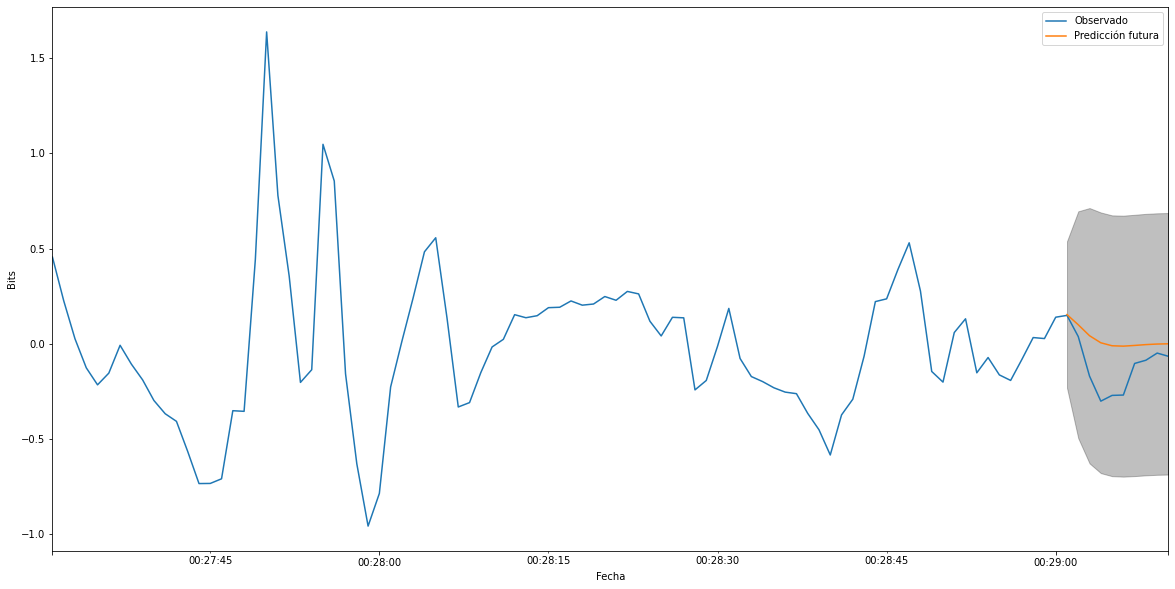

In [63]:
rcParams['figure.figsize'] = 25, 8

pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()
ax = sensor['userAcceleration.x'][-100:].plot(label='Observado', figsize=(20, 10))
pred_uc.predicted_mean.plot(ax=ax, label='Predicción futura')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Fecha')
ax.set_ylabel('Bits')
plt.legend()
plt.show()

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [65]:
# Your code here:
from statsmodels.tools.eval_measures import rmse


In [ ]:
predict = list(pred_uc.predicted_mean)

In [76]:
user = sensor['userAcceleration.x'][-10:].values  
rmse(user, predict)


0.1728140460982883